## Installing and importing modules
Pandas, numpy, matplotlib and seaborn are usually installed within conda. In most cases, I only need to import. If not, the I install with !pip

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%matplotlib inline

## loading the dataset

In [5]:
# reading the downloaded dataset
train_data = pd.read_csv("titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data["Sex"].unique()

array(['male', 'female'], dtype=object)

## exploring the data

In [9]:
# missing or null values in columns
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


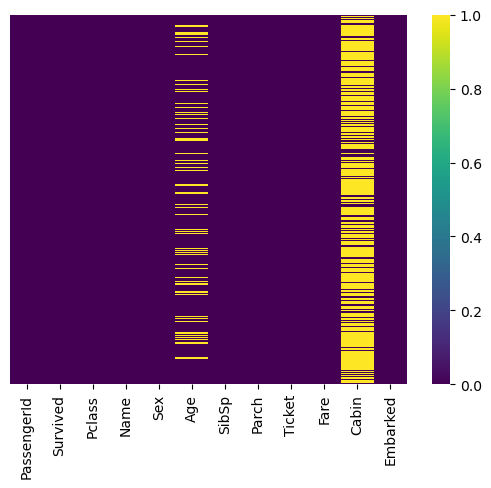

In [15]:
# heatmap to visualize missing values, seeing more than with just isnull
sns.heatmap(train_data.isna(), yticklabels=False, cmap="viridis")
plt.show()

From the above figure, there seems to be a lot of missing values in the cabin column as compared to a few in the age. The proportion of age data missing looks reasonable for imputation. But in cabin, the data missing is so much that being left entirely out of further analysis may be the best option.

In [17]:
# helps to see quanitify missing values in all columns
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

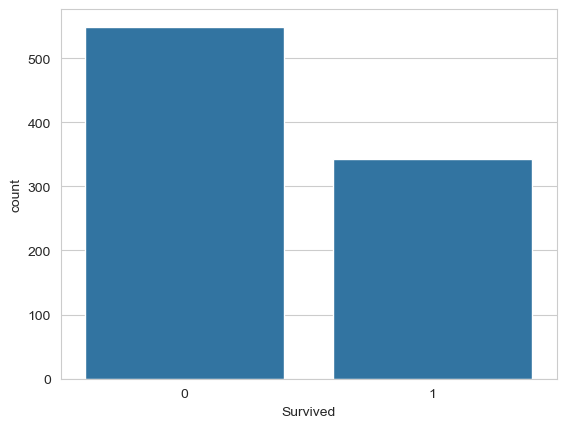

In [19]:
# counting survived passengers
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train_data)
plt.show()

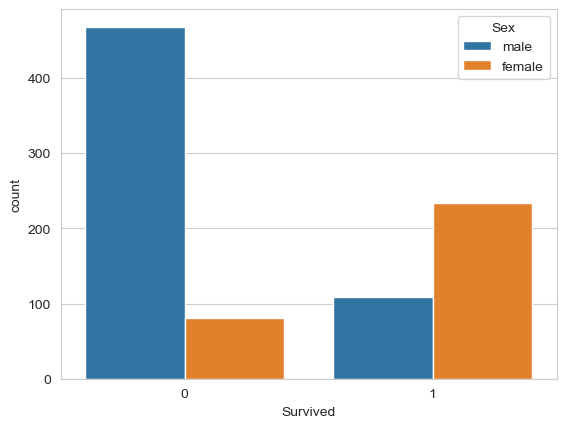

In [21]:
# counting survived passengers based on sex
sns.set_style("whitegrid")
sns.countplot(data=train_data, x="Survived", hue="Sex")
plt.show()

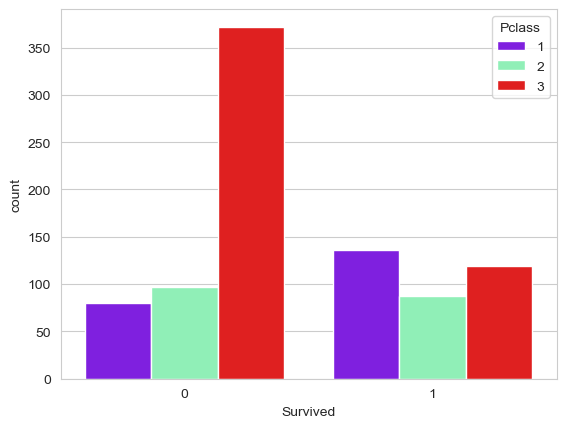

In [23]:
# counting survived passengers based on passenger class
sns.set_style("whitegrid")
sns.countplot(data=train_data, x ="Survived", hue="Pclass", palette="rainbow")
plt.show()

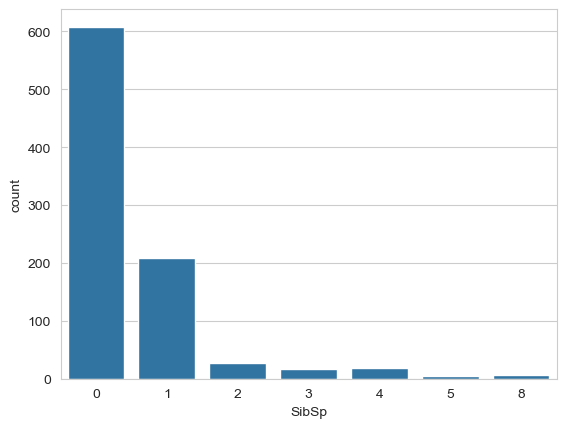

In [25]:
sns.countplot(data=train_data, x="SibSp")
plt.show()

In [27]:
train_data["Age"].isna().any()

True

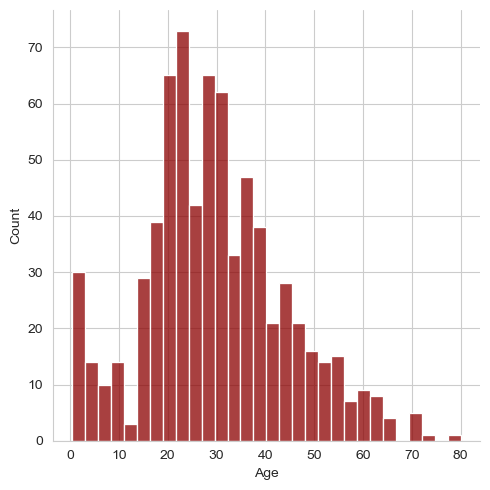

In [29]:
sns.displot(train_data["Age"].dropna(), color="darkred", kde=False, bins=30)
plt.show()

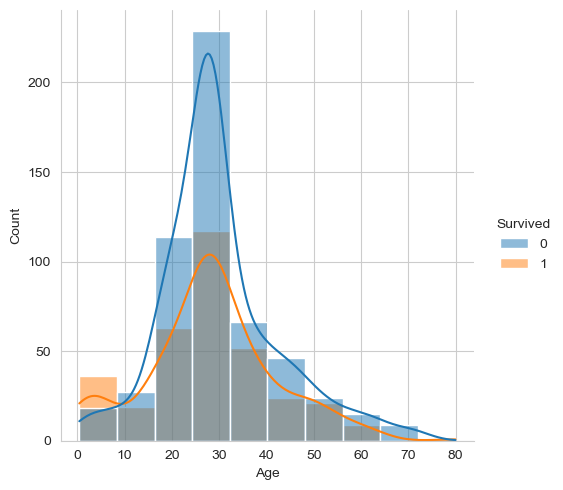

In [31]:
sns.displot(data=train_data, x=train_data["Age"].fillna(train_data["Age"].median()), hue="Survived", kde=True, bins=10)
plt.show()

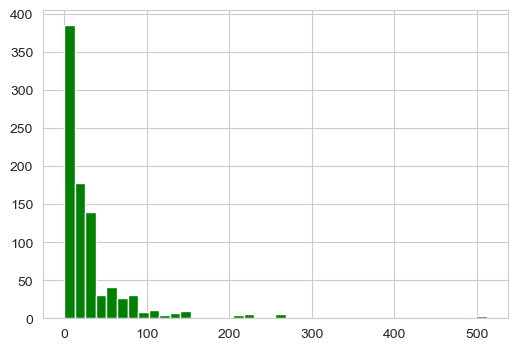

In [33]:
train_data["Fare"].hist(bins=40, color="green", figsize=(6, 4))
plt.show()

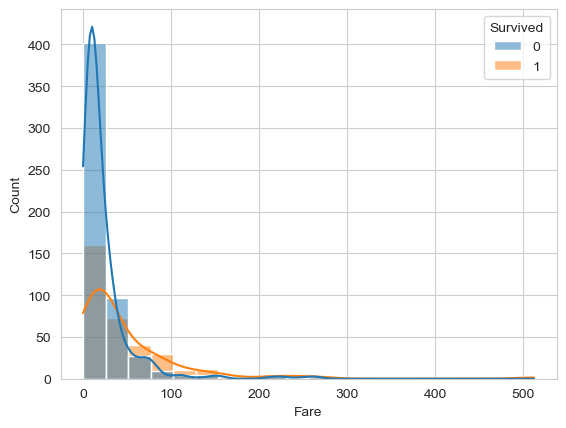

In [35]:
sns.histplot(data=train_data, x="Fare", hue="Survived", kde=True, bins=20)
plt.show()

## observation
1. Around 2 thirds of the passengers died
2. More males died and twice the people who survived are females. Survival rate for males is around 20% and that of females is around 70%
3. Most of the people who died were in the passenger class 3 whereas many of the survivals were in passenger class 1. The difference of survival and death in passenger class 2 is not large
4. Almost 70% travelled without any spouse or siblings whereas about 24% travelled with one sibling or spouse
5. Many of the passengers aboard were between the ages of 15 and 45
6. Most Children, aged below 10, survived whereas the majority of people who died were in their 20s and 30s. Almost no one in the 70s or more survived
7. Majority of the passengers who died had their fares less than 50. Survival rate increased with increasing fare.

## cleaning the data
Given the missing values at age data and cabin, we want to keep and input age data and exclude the cabin data

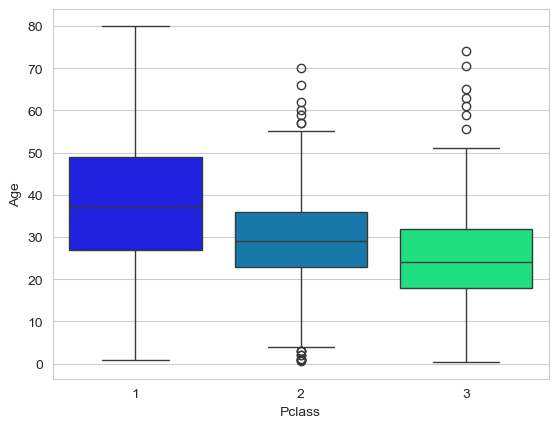

In [37]:
# first, find average age data pair pessenger class
sns.boxplot(data=train_data, x="Pclass", y="Age", palette="winter", hue="Pclass", legend=False)
plt.show()

In [39]:
# train_data.groupby("Pclass")["Age"].mean()
train_data["Age"].groupby(train_data["Pclass"]).median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [41]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [270]:
# # data is skewed and contain outliers, so better to use median than mean
# train_data["Age"] = train_data["Age"].fillna(train_data.groupby('Pclass')['Age'].transform("median"))
# train_data

In [43]:
# custom function to impute age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isna(Age):
        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [45]:
train_data["Age"] = train_data[["Age", "Pclass"]].apply(impute_age, axis=1)

C:\Users\T480\AppData\Local\Temp\ipykernel_30056\213354870.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\T480\AppData\Local\Temp\ipykernel_30056\213354870.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


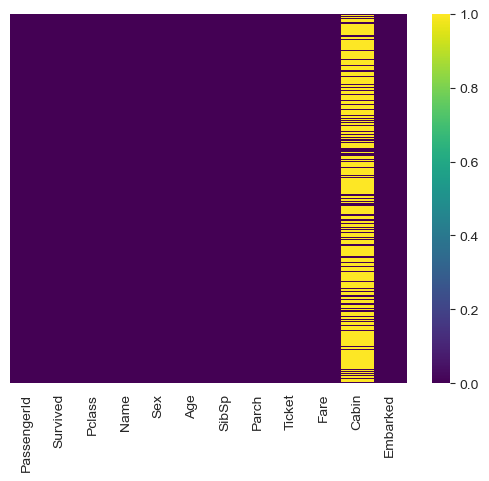

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
sns.heatmap(train_data.isna(), yticklabels=False, cmap="viridis")
plt.show()
pd.isna(train_data).sum()

In [49]:
# drop the cabin column
train_data.drop("Cabin", axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## converting categorical features
Transforming neccessary categorical columns or values to dummy data allow ML algorithms to take them as inputs during further analysis

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Embarked and Sex are two of the 4 categorical data important for further analysis.

In [53]:
# one-hot encoding of embarked and sex
embarked = pd.get_dummies(train_data["Embarked"], drop_first=True, dtype=int)
sex = pd.get_dummies(train_data["Sex"], drop_first=True, dtype=int)

In [386]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [55]:
# drop all categorical data and passengerID
train_data.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [57]:
# add the necessary encoded categorical data
train_data = pd.concat([train_data, sex, embarked], axis=1)
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


## training a model
To predict survival, we use a logistic regression since the prediction class or lable is discrete

In [59]:
# find the features
x = train_data.drop("Survived", axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [61]:
# the label
y = train_data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [63]:
# import modules
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [65]:
# split training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [67]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
# predict with the model
predictions = model.predict(x_test)

In [71]:
# check model performance
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7835820895522388

In [73]:
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[133,  29],
       [ 29,  77]], dtype=int64)